# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from plotnine import *

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [2]:
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [3]:
ct = ColumnTransformer([
  ("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), make_column_selector(dtype_include=object)),
  ("standardize",
  StandardScaler(), make_column_selector(dtype_include=np.number))
  ], remainder = "passthrough"
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

## KNN Model 1

In [4]:
# Code Here

#Model 1: KNN (K = 3)
knn3_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_3", KNeighborsClassifier(n_neighbors=3))]
).set_output(transform = "pandas")

knn3_pipeline.fit(X_train, y_train)


y_pred = knn3_pipeline.predict(X_test)

knn3_conf_matrix = confusion_matrix(y_test, y_pred)
knn3_conf_matrix

array([[40,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 24]])

In [5]:
accuracy_score(y_test, y_pred)

1.0

In [6]:
scores = classification_report(y_test, y_pred, output_dict=True)
scores = pd.DataFrame(scores)
scores

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,40.0,20.0,24.0,1.0,84.0,84.0


In [7]:
y_pred_prob = knn3_pipeline.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("AUC Score (One-vs-Rest):", auc_score)

AUC Score (One-vs-Rest): 1.0


## KNN Model 2

In [8]:
#Model 1: KNN (K = 6)
knn6_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_6", KNeighborsClassifier(n_neighbors=6))]
).set_output(transform = "pandas")

knn6_pipeline.fit(X_train, y_train)


y_pred2 = knn6_pipeline.predict(X_test)

knn6_conf_matrix = confusion_matrix(y_test, y_pred2)
knn6_conf_matrix

array([[40,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 24]])

In [9]:
accuracy_score(y_test, y_pred2)

0.9880952380952381

In [10]:
scores2 = classification_report(y_test, y_pred2, output_dict=True)
scores2 = pd.DataFrame(scores2)
scores2

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.975610,1.000000,1.0,0.988095,0.991870,0.988386
recall,1.000000,0.950000,1.0,0.988095,0.983333,0.988095
f1-score,0.987654,0.974359,1.0,0.988095,0.987338,0.988016
support,40.000000,20.000000,24.0,0.988095,84.000000,84.000000


In [11]:
y_pred_prob2 = knn6_pipeline.predict_proba(X_test)

auc_score2 = roc_auc_score(y_test, y_pred_prob2, multi_class='ovr')
print("AUC Score (One-vs-Rest):", auc_score2)

AUC Score (One-vs-Rest): 1.0


## Decision Tree 1

In [12]:
dt3_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeClassifier(max_depth=3))]
).set_output(transform = "pandas")

dt3_pipeline.fit(X_train, y_train)

y_pred3 = dt3_pipeline.predict(X_test)

dt3_conf_matrix = confusion_matrix(y_test, y_pred3)
dt3_conf_matrix

array([[40,  0,  0],
       [ 3, 17,  0],
       [ 1,  0, 23]])

In [13]:
accuracy_score(y_test, y_pred3)

0.9523809523809523

In [14]:
scores3 = classification_report(y_test, y_pred3, output_dict=True)
scores3 = pd.DataFrame(scores3)
scores3

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.909091,1.000000,1.000000,0.952381,0.969697,0.956710
recall,1.000000,0.850000,0.958333,0.952381,0.936111,0.952381
f1-score,0.952381,0.918919,0.978723,0.952381,0.950008,0.951940
support,40.000000,20.000000,24.000000,0.952381,84.000000,84.000000


In [19]:
y_pred_prob3 = dt3_pipeline.predict_proba(X_test)

auc_score3 = roc_auc_score(y_test, y_pred_prob3, multi_class='ovr')
print("AUC Score (One-vs-Rest):", auc_score3)

AUC Score (One-vs-Rest): 0.9861505681818182


## Decision Tree 2

In [24]:
dt6_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeClassifier(max_depth=6))]
).set_output(transform = "pandas")

dt6_pipeline.fit(X_train, y_train)

y_pred4 = dt6_pipeline.predict(X_test)

dt4_conf_matrix = confusion_matrix(y_test, y_pred4)
dt4_conf_matrix

array([[40,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 24]])

In [25]:
accuracy_score(y_test, y_pred4)

0.9880952380952381

In [26]:
scores4 = classification_report(y_test, y_pred4, output_dict=True)
scores4 = pd.DataFrame(scores4)
scores4

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.975610,1.000000,1.0,0.988095,0.991870,0.988386
recall,1.000000,0.950000,1.0,0.988095,0.983333,0.988095
f1-score,0.987654,0.974359,1.0,0.988095,0.987338,0.988016
support,40.000000,20.000000,24.0,0.988095,84.000000,84.000000


In [27]:
y_pred_prob4 = dt6_pipeline_fitted.predict_proba(X_test)

auc_score4 = roc_auc_score(y_test, y_pred_prob4, multi_class='ovr')
print("AUC Score (One-vs-Rest):", auc_score4)

AUC Score (One-vs-Rest): 0.9878787878787879


## Plot

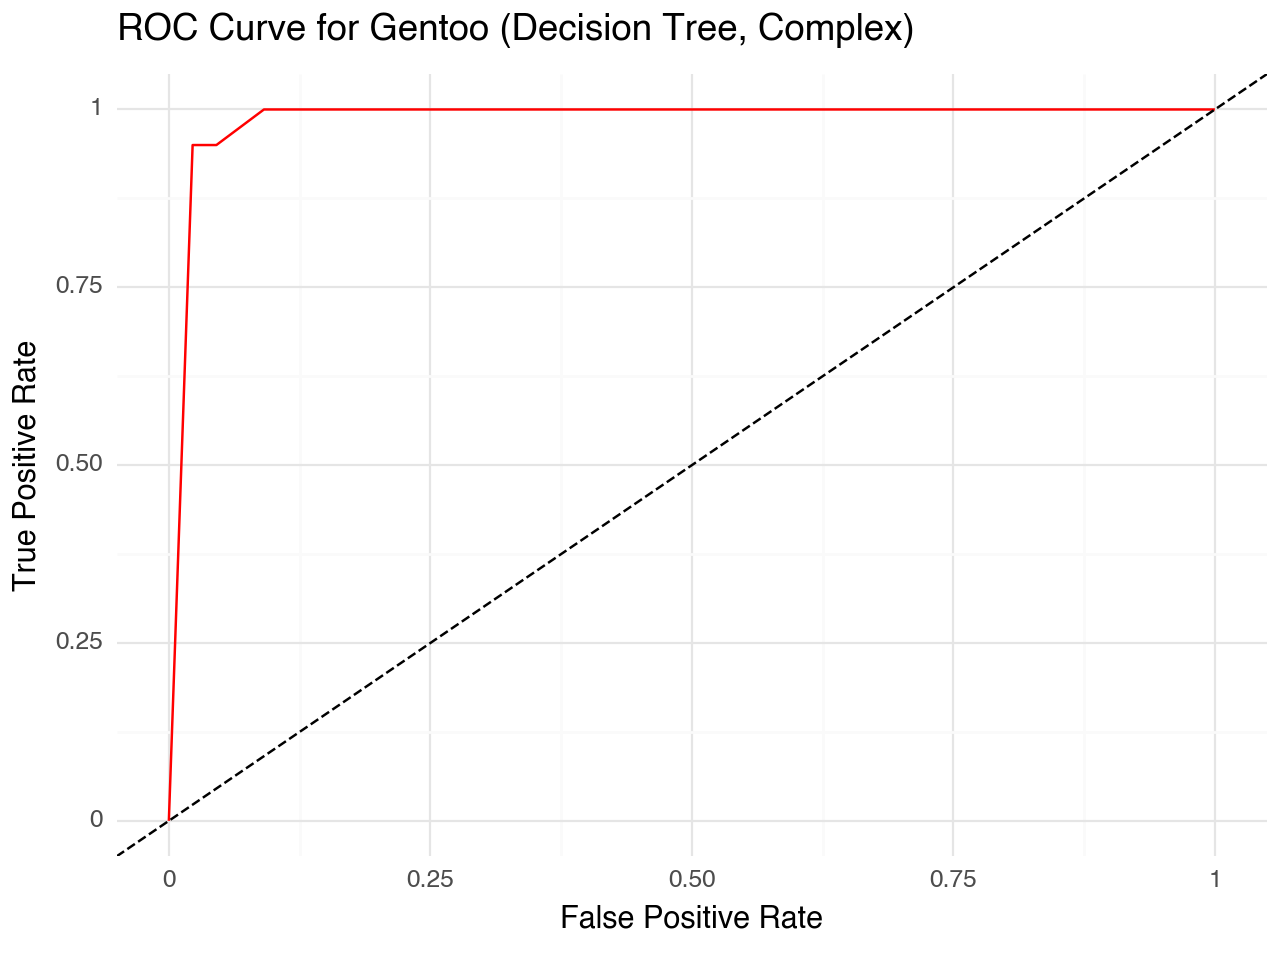

<Figure Size: (640 x 480)>

In [34]:
from sklearn.preprocessing import label_binarize
class_names = ["Adelie", "Chinstrap", "Gentoo"]

y_test_binarized_gentoo = label_binarize(y_test, classes=class_names)[:, class_names.index('Adelie')]

y_test_pred_proba_gentoo = dt3_pipeline.predict_proba(X_test)[:, class_names.index('Adelie')]


fpr_gentoo, tpr_gentoo, thresholds_gentoo = roc_curve(y_test_binarized_gentoo, y_test_pred_proba_gentoo)

roc_data_gentoo = pd.DataFrame({
    'False Positive Rate': fpr_gentoo,
    'True Positive Rate': tpr_gentoo
})


(ggplot(roc_data_gentoo, aes(x='False Positive Rate', y='True Positive Rate'))
    + geom_line(color = "red")
    + geom_abline(linetype='dashed')
    + labs(title='ROC Curve for Gentoo (Decision Tree, Complex)', x='False Positive Rate', y='True Positive Rate')
    + theme_minimal()
)

